## Medical Cost Personal Datasets: https://www.kaggle.com/mirichoi0218/insurance

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

#                                Functions









## Dataset management

In [2]:
def load_datasets(filename):
    df = pd.read_csv(filename)
    X, y = df[["age", "sex", "bmi", "children", "smoker", "region"]], df["charges"]    
    return X, y

In [3]:
def load_full(filename):
    data = pd.read_csv(filename)
    return data

In [4]:
def split_datasets(X, y, test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    return X_train, X_test, y_train, y_test

In [5]:
def convertStr2Int(dataset):
    
    #sex
    le = LabelEncoder()
    le.fit(dataset.sex.drop_duplicates())
    dataset.sex = le.transform(dataset.sex)
    
    # smoker or not
    le.fit(dataset.smoker.drop_duplicates()) 
    dataset.smoker = le.transform(dataset.smoker)
    
    #region
    le.fit(dataset.region.drop_duplicates()) 
    dataset.region = le.transform(dataset.region)
    
    return dataset









## Correlation

In [6]:
def correlation(data):
    f, ax = plt.subplots(figsize=(8,8))
    data, m, s = normalize(data)
    sns.heatmap(data.corr(), annot=True, fmt='.2f', ax=ax)
    plt.show()
    
    corr_data, m, s = normalize(data)
    sns.pairplot(corr_data)









## Data info

In [7]:
def dataset_general_info(data):
    data.shape
    
    #columns info
    print("Maximum number of children covered by health insurance: {}".format(data.children.max()))
    print("Minimal age: {}; maximal age: {}".format(data.age.min(), data.age.max()))
    print("Minimal charge value: {}; maximal value: {}".format(data.charges.min(), data.charges.max()))

In [8]:
def plot_prop(ax, column, num_bins, x_label, y_label, title):
    #fig, ax = plt.subplots(1, 1)
    n, bins, patches = ax.hist(column, bins=num_bins, density=0)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    
    #fig.tight_layout()
    return patches

In [9]:
def plot_props(data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 15))
    axs[0, 0] = plot_prop(axs[0, 0], data['sex'], 2, 'Sex', 'Number of gender', 'Sex info:')
    axs[0, 1] = plot_prop(axs[0, 1], data['age'], 5, 'Age', 'Age amount', 'Age info:')
    axs[0, 2] = plot_prop(axs[0, 2], data['smoker'], 2, 'Smoker', 'Amount', 'Smoker info:')
    
    axs[1, 0] = plot_prop(axs[1, 0], data['bmi'], 50, 'BMI', 'BMI amount', 'BMI info:')
    axs[1, 1] = plot_prop(axs[1, 1], data['children'], 5, 'Children', 'Amount', 'Children info:')
    axs[1, 2] = plot_prop(axs[1, 2], data['region'], 4, 'Region', 'Citizen amount', 'Region info:')
    
    fig, ax = plt.subplots(figsize=(7,7))
    ax = plot_prop(ax, data['charges'], 50, 'Charges', 'Number of charge values', 'Histogram of Charges:')
    
    plt.show()

In [10]:
def age_charges(data):
    plt.plot(data['age'], data['charges'], linestyle='', marker='o', markersize=0.8)
    plt.xlabel('Age')
    plt.ylabel('Charges')
    plt.title('Distribution of Charges based on Age', loc='left')

In [11]:
def show_smoker_charges(data):
    sns.swarmplot(x = 'smoker', y = 'charges', data = data, hue = 'smoker', order = ['yes', 'no'])
    plt.show()

In [12]:
def show_sex_charges(data):
    sns.swarmplot(x = 'sex', y = 'charges', data = data, hue = 'sex', order = ['male', 'female'])
    plt.show()

In [13]:
def show_regionSmoker_charges(data):
    sns.swarmplot(x = 'region', y = 'charges', data = data, hue = 'smoker', 
                  order = ['southwest', 'northwest', 'northeast', 'southeast'])
    plt.show()









## Preparation to LR

In [14]:
def prepare_X(X):
    m = X.shape[0]
    ones = np.ones((m, 1))
    X_new = np.array(X[:])
    X_new = np.column_stack((ones, X_new))
    return X_new

In [15]:
def normalize(X):
    X = convertStr2Int(X)

    mean = np.mean(X)
    std = np.std(X)
    X_new = (X - mean) / std
    
    return X_new, mean, std









## Linear Regression

In [16]:
def hypothesis(X, theta):
    h_theta = np.dot(X, theta)
    return h_theta

In [17]:
def cost_function(X, y, theta):
    m = X.shape[0]
    if m == 0:
        return None
    J = np.sum((hypothesis(X, theta) - y)**2)/(2*m)
    return J

In [18]:
def derivative(X, y, theta):
    m = X.shape[0]
    d_theta = np.dot(hypothesis(X, theta) - y, X) / m
    return d_theta

In [19]:
def gradient_descent(X, y, theta, alpha, num_iters, print_J = True):
    m = X.shape[0]
    J_history = []
    J = cost_function(X, y, theta)
    if print_J == True:
        print(J)
    J_history.append(J)
    for i in range(num_iters):
        delta = alpha*derivative(X, y, theta)
        theta = theta - delta
        J = cost_function(X, y, theta)
        if print_J == True:
            print(J)
        J_history.append(J)
    return theta, J_history

## sklearn algorithm

In [20]:
def sklearnAlgorithm(X_train, X_test, y_train, y_test):
    scaler = preprocessing.StandardScaler().fit(X_train)
    
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict(X_test)
    
    y_test_pred = y_test_pred.astype('int')
    y_test = y_test.astype('int')
    
    d = y_test - y_test_pred
    MSE = np.mean(d**2)
    MAE = np.mean(abs(d))
    RMSE = np.sqrt(MSE)
    
    return MSE, MAE, RMSE

#                          Algorithm

### Dataset reading 

In [21]:
data = load_full('insurance.csv')
X, y = load_datasets('insurance.csv')
y.shape

(1338,)

### Checking the data

In [22]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [23]:
print("The null-values statiscics:")
data.isnull().sum()

The null-values statiscics:


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Since there are no null values in the dataset, there is nothing to fill with mean values.
Also, there are only 1338 rows, so ALL this data will be visualized.

In [24]:
print('Dataset: X={}, y={}'.format(X.shape, y.shape))
dataset_general_info(data)

Dataset: X=(1338, 6), y=(1338,)
Maximum number of children covered by health insurance: 5
Minimal age: 18; maximal age: 64
Minimal charge value: 1121.8739; maximal value: 63770.42801


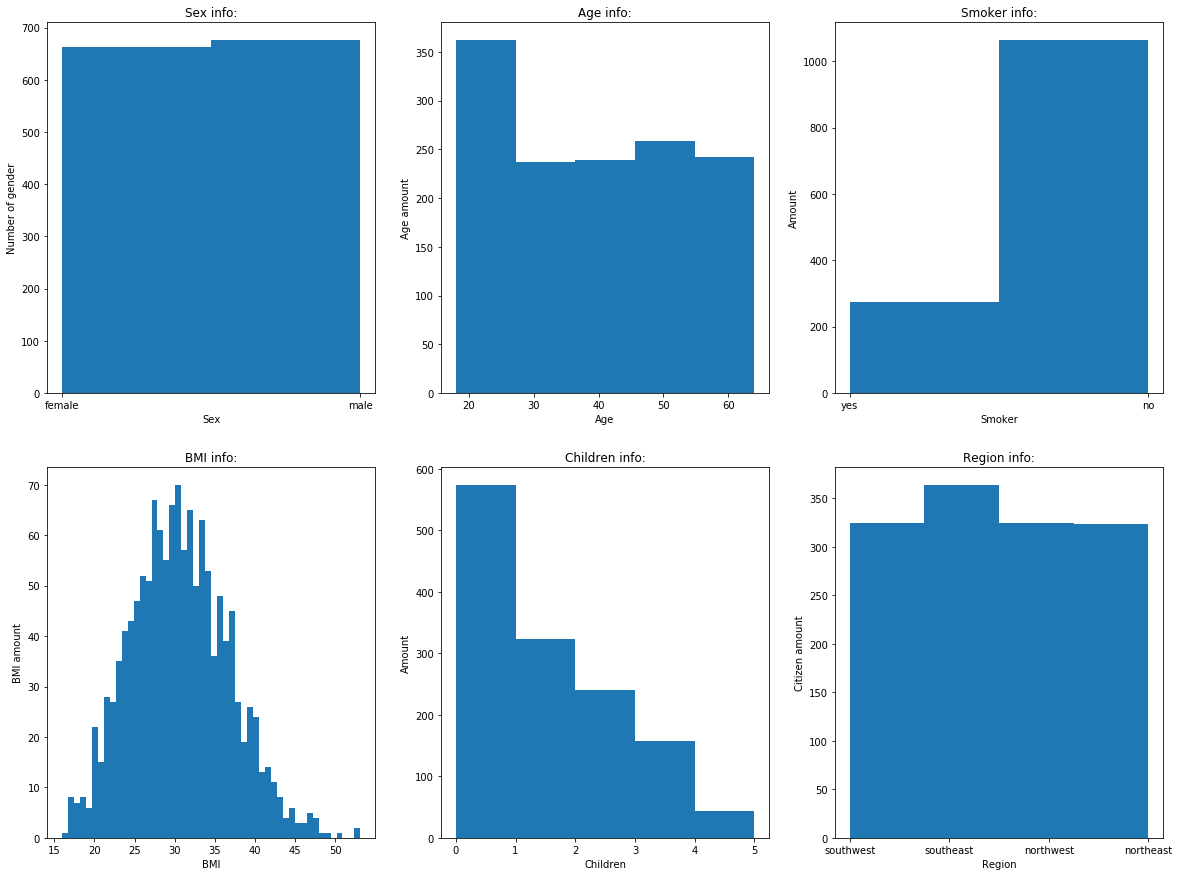

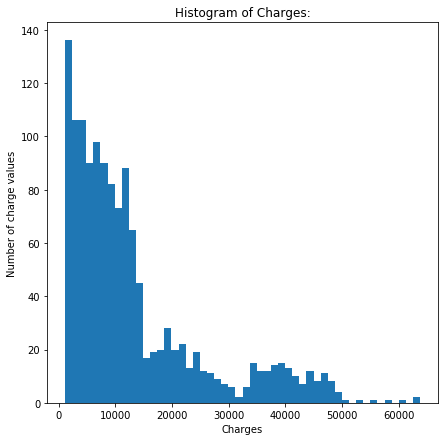

In [25]:
plot_props(data)

### Correlation

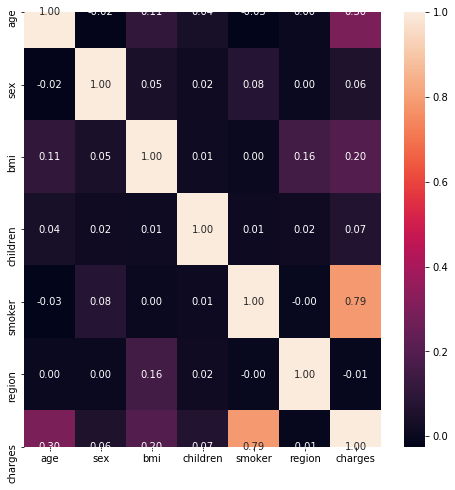

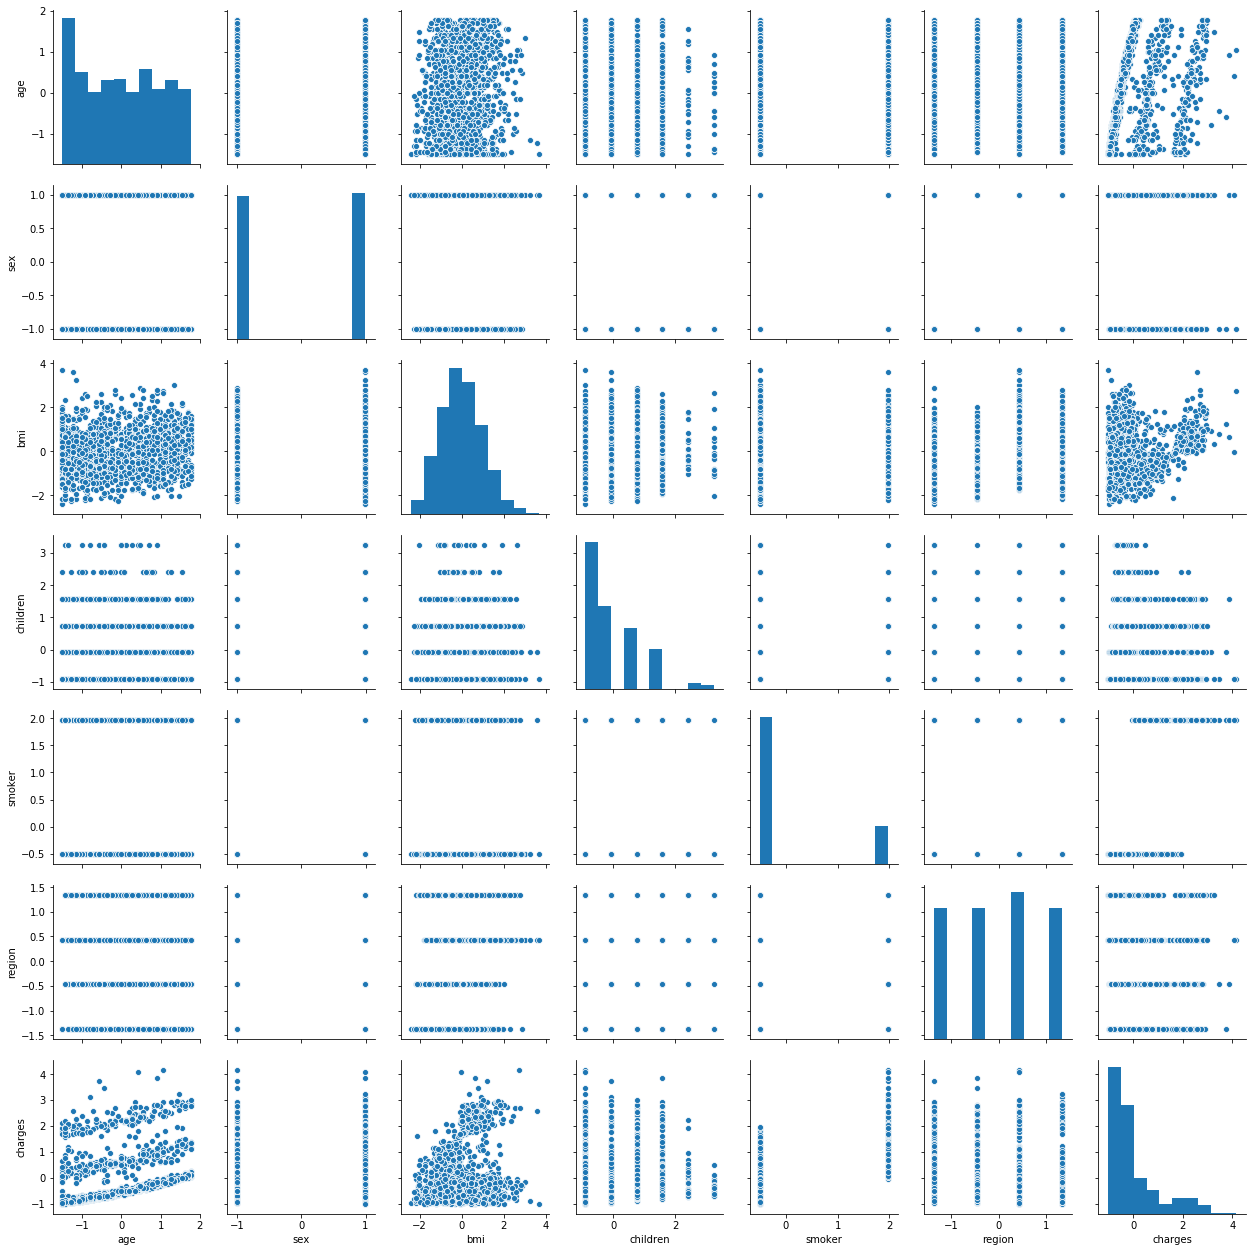

In [26]:
correlation(data)

### Data visualization

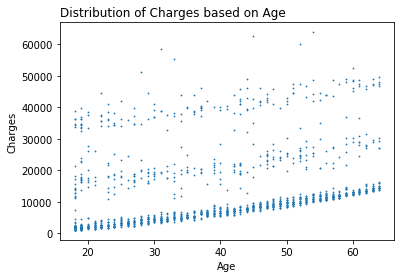

In [27]:
age_charges(data)

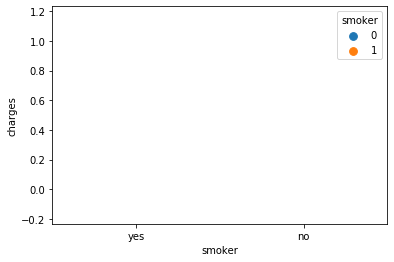

In [28]:
#show_smoker_charges(data)
show_smoker_charges(data.head(100))

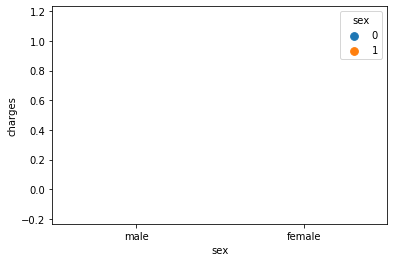

In [29]:
#show_sex_charges(data)
sns.swarmplot(x = 'sex', y = 'charges', data = data.head(200), hue = 'sex', order = ['male', 'female'])
plt.show()

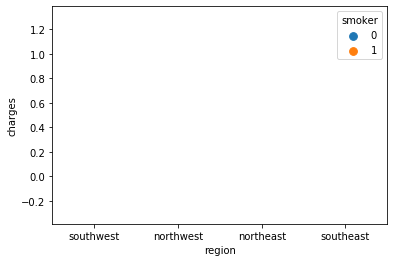

In [30]:
#show_regionSmoker_charges(data)
show_regionSmoker_charges(data.head(100))

You might need to rerun three previous cells to see the swarmplot result: there are some bugs, probably because of a huge amount of data. For some reason, it finishes executing with giving no result.

##       Linear Regression

### Dataset splitting

In [31]:
X_train, X_test, y_train, y_test = split_datasets(X, y, 0.2)
print('Training set: X={}, y={}'.format(X_train.shape, y_train.shape))
print('Test set: X={}, y={}'.format(X_test.shape, y_test.shape))

Training set: X=(1070, 6), y=(1070,)
Test set: X=(268, 6), y=(268,)


In [32]:
X_train_norm, mean, std = normalize(X_train)
X = prepare_X(X_train_norm)

C:\Users\Andriy Orlyk\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [33]:
X_train_norm.head(10)

,age,sex,bmi,children,smoker,region
411,0.325788,-1.020777,-1.705590,-0.062086,1.971255,-1.374427
439,-0.946449,0.979646,-0.200250,-0.902994,-0.507291,-1.374427
1253,0.043068,-1.020777,-0.224754,2.460638,-0.507291,1.343940
445,0.396468,-1.020777,0.396005,-0.902994,-0.507291,1.343940
199,1.739385,-1.020777,1.413722,-0.902994,-0.507291,-1.374427
130,1.385986,-1.020777,-0.681338,-0.902994,-0.507291,-1.374427
770,1.527345,0.979646,0.886077,1.619730,-0.507291,1.343940
499,1.598025,-1.020777,1.392485,-0.902994,-0.507291,1.343940
749,-0.805090,0.979646,0.032534,-0.902994,-0.507291,-0.468304
158,-0.663730,0.979646,0.792963,-0.902994,1.971255,0.437818


In [34]:
y = y_train[:]

y_mean = np.mean(y)
y_std = np.std(y)    
y = (y - y_mean) / y_std

print('X: {}'.format(X.shape))
print('y: {}'.format(y.shape))

X: (1070, 7)
y: (1070,)


In [35]:
theta = np.array([0, 0, 0, 0, 0, 0, 0])
print(cost_function(X, y, theta))

0.5000000000000003


## Regression parameters

alpha is a learning rate.
num_iters is a maximum number of algorithm iterations.

In [36]:
alpha = 0.01
num_iters = 1500

## Main process

In [37]:
new_theta, Js = gradient_descent(X, y, theta, alpha, num_iters, False)
print('Theta: [{}, {}, {}, {}, {}, {}, {}]'.format(new_theta[0], new_theta[1], new_theta[2], new_theta[3], new_theta[4], new_theta[5], new_theta[6]))

Theta: [-5.712937910901986e-16, 0.28980173855014535, -0.003018797553015753, 0.16656988222440142, 0.05621201377483141, 0.7881180851539049, -0.03175127471799695]


## Result analysis

As we can see, theta0, theta5 and theta1 are the greatest in theta array, so the charges value mostly depends on smoker and age characteristics (theta0 refers to the column of 1).

The top of characteristics, which influence charges value:
1. Smoker
2. Age
3. BMI
4. Children
5. Sex
6. Region

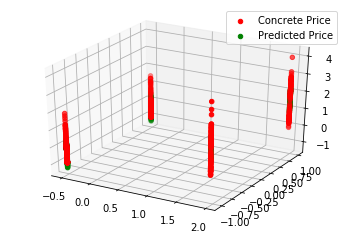

In [38]:
y_algorithm = np.dot(X, new_theta)

#since theta0 and theta5 are the greatest in theta array:
fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 5], X[:, 2], y, color='r', label='Concrete Price')
ax.scatter(X[:, 5], X[:, 2], y_algorithm, color='g', label='Predicted Price')
ax.legend()
plt.show()

## Error

MSE  is Mean Absolute Error - represents the difference between the original and predicted values extracted by averaged the absolute difference over the data set.

MAE  is Mean Squared Error  - represents the difference between the original and predicted values extracted by squared the average difference over the data set.

RMSE is Root Mean Squared Error - is the error rate by the square root of MSE.

In [39]:
X_test, mean, std = normalize(X_test)
X_test_proc = prepare_X(X_test)
y_test_pred = hypothesis(X_test_proc, new_theta)

y_test_mean = np.mean(y_test)
y_test_std = np.std(y_test) 
y_test = (y_test - y_test_mean) / y_test_std

d = y_test - y_test_pred
MSE = np.mean(d**2)
MAE = np.mean(abs(d))
RMSE = np.sqrt(MSE)
rel_diff = np.abs(np.divide(y_test - y_test_pred, y_test)) * 100

res = pd.DataFrame({'y_actual' : y_test, 'y_pred' : y_test_pred, 'err' : rel_diff})
print(res)
print('MSE  = ', MSE)
print('MAE  = ', MAE)
print('RMSE = ', RMSE)

print(cost_function(X_test_proc, y_test, new_theta))

      y_actual    y_pred         err
593   0.247547  0.973222  293.146079
57    1.912770  1.163695   39.161774
173  -0.641412 -0.405854   36.724841
558   2.412077  1.672606   30.657011
1238 -0.488510 -0.530486    8.592833
...        ...       ...         ...
954   0.656339  1.381939  110.552730
996  -0.450447 -0.251044   44.267809
806   1.400615 -0.057960  104.138207
1248 -0.958922 -0.644454   32.793916
1147 -0.903754 -0.792775   12.279749

[268 rows x 3 columns]
MSE  =  0.23361398692751878
MAE  =  0.3316265409201704
RMSE =  0.48333630830666835
0.11680699346375945


In [40]:
X_test, mean, std = normalize(X_test)
X_test = prepare_X(X_test)

X_train, m, s = normalize(X_train)
X_train = prepare_X(X_train)

y_test_mean = np.mean(y_test)
y_test_std = np.std(y_test) 
y_test = (y_test - y_test_mean) / y_test_std

y_train_mean = np.mean(y_train)
y_train_std = np.std(y_train)
y_train = (y_train - y_train_mean) / y_train_std

skl_MSE, skl_MAE, skl_RMSE = sklearnAlgorithm(X_train, X_test, y_train, y_test)

print('sklearn algorithm result:')
print('MSE  = ', skl_MSE)
print('MAE  = ', skl_MAE)
print('RMSE = ', skl_RMSE)

sklearn algorithm result:
MSE  =  0.23507462686567165
MAE  =  0.22014925373134328
RMSE =  0.48484495136659067


In [41]:
print("The difference between my algorithm's errors and slkearn's errors:")
print('MSE:  ', (MSE-skl_MSE).round(5))
print('MAE:  ', (MAE-skl_MAE).round(5))
print('RMSE: ', (RMSE-skl_RMSE).round(5))

The difference between my algorithm's errors and slkearn's errors:
MSE:   -0.00146


AttributeError: 'float' object has no attribute 'round'

Sure, it is expected that Python's algorithm works better. Error differences, however, are little, which means that my algorithm seems to work properly.